# **1. 환경 설정 및 데이터 구조 파악**

In [38]:
# 필요한 라이브러리를 import 합니다
import pandas as pd
import json
from matplotlib import pyplot as plt
import folium
!sudo apt-get install -y NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumGothic')

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [39]:
# 아래 데이터 셋을 사용합니다
# https://www.kaggle.com/datasets/hgultekin/covid19-stream-data?resource=download

with open('./json', 'r') as json_file :
    js = json.load(json_file)
js = js['records']

with open('./json_1', 'r') as json_file2 :
    js2 = json.load(json_file2)
js2 = js2['records']

In [40]:
# 데이터 프레임으로 불러옵니다
df = pd.DataFrame(js)
df2 = pd.DataFrame(js2)


In [41]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.01377925
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.05277624
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.86876792
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.13426564
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.96865815
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,03,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,
61896,24/03/2020,24,03,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,
61897,23/03/2020,23,03,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,
61898,22/03/2020,22,03,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,


In [42]:
df2

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,29/08/2022,29,08,2022,5046.0,2.0,Austria,AT,AUT,8901064,Europe
1,28/08/2022,28,08,2022,2818.0,4.0,Austria,AT,AUT,8901064,Europe
2,27/08/2022,27,08,2022,4006.0,1.0,Austria,AT,AUT,8901064,Europe
3,26/08/2022,26,08,2022,5163.0,6.0,Austria,AT,AUT,8901064,Europe
4,25/08/2022,25,08,2022,5116.0,5.0,Austria,AT,AUT,8901064,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27227,08/02/2020,08,02,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
27228,07/02/2020,07,02,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
27229,06/02/2020,06,02,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
27230,05/02/2020,05,02,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe


In [43]:
covid = pd.concat([df2, df], ignore_index=True)
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/08/2022,29,08,2022,5046.0,2.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
1,28/08/2022,28,08,2022,2818.0,4.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
2,27/08/2022,27,08,2022,4006.0,1.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
3,26/08/2022,26,08,2022,5163.0,6.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
4,25/08/2022,25,08,2022,5116.0,5.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89127,25/03/2020,25,03,2020,0.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89128,24/03/2020,24,03,2020,0.0,1.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89129,23/03/2020,23,03,2020,0.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89130,22/03/2020,22,03,2020,1.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,


In [44]:
# 결측값 확인합니다
covid.isnull().sum()

dateRep                                                           0
day                                                               0
month                                                             0
year                                                              0
cases                                                            96
deaths                                                          284
countriesAndTerritories                                           0
geoId                                                             0
countryterritoryCode                                            123
popData2020                                                   61900
continentExp                                                      0
popData2019                                                   27355
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    27232
dtype: int64

In [45]:
covid.sort_values("cases")

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
8632,20/05/2021,20,05,2021,-348846.0,133.0,France,FR,FRA,67320216,Europe,NaN,NaN
44138,07/09/2020,07,09,2020,-8261.0,3800.0,Ecuador,EC,ECU,NaN,America,17373657.0,11.59801877
12820,15/02/2022,15,02,2022,-5532.0,17.0,Ireland,IE,IRL,4964440,Europe,NaN,NaN
3755,21/01/2022,21,01,2022,-3203.0,3.0,Cyprus,CY,CYP,888005,Europe,NaN,NaN
10605,21/02/2021,21,02,2021,-2859.0,0.0,Greece,EL,GRC,10718565,Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25467,11/04/2022,11,04,2022,NaN,38.0,Spain,ES,ESP,47332614,Europe,NaN,NaN
25468,10/04/2022,10,04,2022,NaN,47.0,Spain,ES,ESP,47332614,Europe,NaN,NaN
25469,09/04/2022,09,04,2022,NaN,42.0,Spain,ES,ESP,47332614,Europe,NaN,NaN
25471,07/04/2022,07,04,2022,NaN,53.0,Spain,ES,ESP,47332614,Europe,NaN,NaN


In [46]:
# cases와 deaths의 이상치(-값) 제거. cases와 deaths가 0 이상인 데이터만 사용

covid = covid[(covid['cases'] >= 0) & (covid['deaths'] >= 0) ]

In [47]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/08/2022,29,08,2022,5046.0,2.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
1,28/08/2022,28,08,2022,2818.0,4.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
2,27/08/2022,27,08,2022,4006.0,1.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
3,26/08/2022,26,08,2022,5163.0,6.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
4,25/08/2022,25,08,2022,5116.0,5.0,Austria,AT,AUT,8901064,Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89127,25/03/2020,25,03,2020,0.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89128,24/03/2020,24,03,2020,0.0,1.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89129,23/03/2020,23,03,2020,0.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,
89130,22/03/2020,22,03,2020,1.0,0.0,Zimbabwe,ZW,ZWE,NaN,Africa,14645473.0,


In [48]:
# 데이터 타입 조회합니다
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88696 entries, 0 to 89131
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     88696 non-null  object 
 1   day                                                         88696 non-null  object 
 2   month                                                       88696 non-null  object 
 3   year                                                        88696 non-null  object 
 4   cases                                                       88696 non-null  float64
 5   deaths                                                      88696 non-null  float64
 6   countriesAndTerritories                                     88696 non-null  object 
 7   geoId                                                       88696 non-null  object 
 

In [49]:
# date 정보를 수정합니다(object -> datetime) 
covid['dateRep'] = covid['dateRep'].astype('datetime64')
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88696 entries, 0 to 89131
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     88696 non-null  datetime64[ns]
 1   day                                                         88696 non-null  object        
 2   month                                                       88696 non-null  object        
 3   year                                                        88696 non-null  object        
 4   cases                                                       88696 non-null  float64       
 5   deaths                                                      88696 non-null  float64       
 6   countriesAndTerritories                                     88696 non-null  object        
 7   geoId                 

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **2. 국가별 최신 확진자, 사망자, 회복자 데이터 분석**

In [50]:
# 날짜별 최신 데이터만 남깁니다
# dateRep을 우선으로 해서 정렬
latest_covid = covid.sort_values(['dateRep', 'countriesAndTerritories'], ascending=False)
# 컬럼의 countriesAndTerritories가 중복인 값들은 제거한 index를 만듦(default ==> 가장 먼저 찾아진 값들만 남겨놓음)
latest_covid_idx = latest_covid[['countriesAndTerritories']].drop_duplicates().index
# 최신날짜 index의 row들만 가져옴
latest_covid = latest_covid.loc[latest_covid_idx]
latest_covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26311,2022-12-08,12,08,2022,1245.0,16.0,Sweden,SE,SWE,10327589,Europe,NaN,NaN
25386,2022-12-08,12,08,2022,13582.0,236.0,Spain,ES,ESP,47332614,Europe,NaN,NaN
24489,2022-12-08,12,08,2022,1591.0,2.0,Slovenia,SI,SVN,2095861,Europe,NaN,NaN
23581,2022-12-08,12,08,2022,1116.0,7.0,Slovakia,SK,SVK,5457873,Europe,NaN,NaN
22713,2022-12-08,12,08,2022,5710.0,20.0,Romania,RO,ROU,19328838,Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28198,2020-12-14,14,12,2020,50.0,1.0,Andorra,AD,AND,NaN,Europe,76177.0,821.77035063
27853,2020-12-14,14,12,2020,464.0,12.0,Algeria,DZ,DZA,NaN,Africa,43053054.0,22.95075281
27572,2020-12-14,14,12,2020,788.0,14.0,Albania,AL,ALB,NaN,Europe,2862427.0,380.97041427
27232,2020-12-14,14,12,2020,746.0,6.0,Afghanistan,AF,AFG,NaN,Asia,38041757.0,9.01377925


In [51]:
# 국가별 cases와 deaths를 구합니다

# countriesAndTerritories를 인덱스로 해서, cases와 deaths 정보를 가져옴
lastest_cases_deaths = latest_covid[["countriesAndTerritories","cases", "deaths", "dateRep"]].set_index('countriesAndTerritories')
lastest_cases_deaths

,cases,deaths,dateRep
countriesAndTerritories,,,
Sweden,1245.0,16.0,2022-12-08
Spain,13582.0,236.0,2022-12-08
Slovenia,1591.0,2.0,2022-12-08
Slovakia,1116.0,7.0,2022-12-08
Romania,5710.0,20.0,2022-12-08
...,...,...,...
Andorra,50.0,1.0,2020-12-14
Algeria,464.0,12.0,2020-12-14
Albania,788.0,14.0,2020-12-14


In [52]:
# 사망자가 높은 국가순으로 정렬합니다
lastest_cases_deaths.sort_values("deaths", ascending=False)

,cases,deaths,dateRep
countriesAndTerritories,,,
United_States_of_America,189723.0,1340.0,2020-12-14
Russia,28080.0,488.0,2020-12-14
India,27071.0,336.0,2020-12-14
Brazil,21825.0,279.0,2020-12-14
Mexico,8608.0,249.0,2020-12-14
...,...,...,...
Seychelles,0.0,0.0,2020-12-14
Kazakhstan,764.0,0.0,2020-12-14
Vanuatu,0.0,0.0,2020-12-14


# **3. 시간에 따른 확진자, 사망자, 회복자 시각화**

In [53]:
# 날짜별 cases와, deaths의 합계를 구합니다
date_cases_deaths = covid.groupby("dateRep").sum()[["cases", "deaths"]]
date_cases_deaths

,cases,deaths
dateRep,,
2019-12-31,27.0,0.0
2020-01-01,2.0,0.0
2020-01-02,2138.0,46.0
2020-01-03,3190.0,63.0
2020-01-04,102849.0,7731.0
...,...,...
2022-12-04,584127.0,1041.0
2022-12-05,198439.0,456.0
2022-12-06,128420.0,117.0


In [54]:
# cases 오름차순으로 정렬
date_cases_deaths.sort_values("cases")

,cases,deaths
dateRep,,
2020-04-01,0.0,0.0
2020-09-01,0.0,0.0
2020-06-01,0.0,0.0
2020-01-16,1.0,0.0
2020-01-14,1.0,0.0
...,...,...
2022-01-27,1429825.0,1979.0
2022-08-02,1445109.0,2899.0
2022-01-02,1486785.0,2389.0


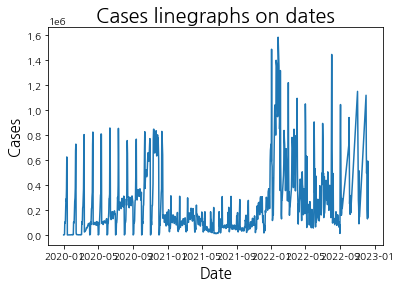

In [55]:
# 시간에 따른 cases와 deaths의 라인 그래프를 그려봅니다

# 시간에 따른 cases의 라인그래프
cases = date_cases_deaths["cases"]
# x축(날짜), y축(cases)
x_values = date_cases_deaths.index
plt.plot(x_values, cases)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.title('Cases linegraphs on dates', fontsize=20)
plt.show()

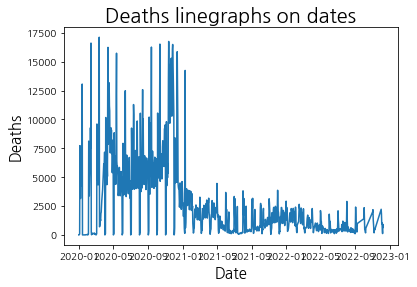

In [56]:
# 시간에 따른 deaths의 라인그래프
deaths = date_cases_deaths["deaths"]
# x축(날짜), y축(deaths)
x_values = date_cases_deaths.index
plt.plot(x_values, deaths)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Deaths', fontsize=15)
plt.title('Deaths linegraphs on dates', fontsize=20)
plt.show()

# **5. 코로나 바이러스 감염 지도 표시**

In [57]:
# countryterritoryCode가 KOR인 row들만 저장
korea = covid[covid['countryterritoryCode'] == 'KOR']
korea

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
79352,2020-12-14,14,12,2020,718.0,7.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,18.12189718
79353,2020-12-13,13,12,2020,1030.0,2.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,17.45621077
79354,2020-12-12,12,12,2020,950.0,6.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,16.32200606
79355,2020-11-12,11,12,2020,688.0,8.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,15.42010835
79356,2020-10-12,10,12,2020,666.0,8.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,15.18780136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79697,2020-04-01,04,01,2020,0.0,0.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,
79698,2020-03-01,03,01,2020,0.0,0.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,
79699,2020-02-01,02,01,2020,0.0,0.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,
79700,2020-01-01,01,01,2020,0.0,0.0,South_Korea,KR,KOR,NaN,Asia,51225321.0,


In [58]:
#cases와 deaths의 합을 변수에 저장
korea_cases = int(korea['cases'].sum())
korea_deaths = int(korea['deaths'].sum())
print(korea_cases, korea_deaths)

43484 587


In [61]:
# 지도에 우리나라 cases와 deaths 합계를 CircleMarker로 출력합니다
from textwrap import fill
from turtle import color

# 메세지에 cases와 deaths 합계가 출력되도록
msg = "Cases 합계 : {} \n Deaths 합계 : {}".format(korea_cases, korea_deaths)
covid_map = folium.Map(location = [36.55, 127.75], zoom_start=7)

popup = folium.Popup(msg)
folium_map = folium.CircleMarker(location=[36.55, 127.75], popup=popup, color= 'red', radius=150, tooltip=msg, fill = "red").add_to(covid_map)
covid_map